In [ ]:
# 주제 모델 만들기

In [2]:
# pip install gensim
%matplotlib inline

from __future__ import print_function
from gensim import corpora, models, similarities
from mpltools import style
import matplotlib.pyplot as plt
import numpy as np
from os import path
style.use('ggplot')

In [3]:
corpus = corpora.BleiCorpus('09_data/lda/ap/ap.dat', '09_data/lda/ap/vocab.txt')

In [5]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=None)

In [6]:
for ti in xrange(84):
    words = model.show_topic(ti, 64)
    tf = sum(f for f,w in words)
    print('\n'.join('{}:{}'.format(w, int(1000.*f/tf)) for f,w in words))
    print()
    print()
    print()

requiring:16
making:16
paisley:16
continue:16
opened:16
allocate:16
device:16
trowbridge:16
tightly:16
knowing:16
delaying:16
engine:15
shadow:15
showdown:15
ms:15
goals:15
possible:15
embraced:15
fred:15
supplier:15
forming:15
lithuania:15
pumped:15
unity:15
envoy:15
rumors:15
tips:15
pleased:15
moore:15
assess:15
travelers:15
literally:15
devices:15
hurting:15
att:15
facilities:15
funeral:15
submarine:15
barahona:15
jorge:15
informed:15
kathleen:15
mcfarlane:15
blier:15
death:15
africans:15
insurance:15
canning:15
digital:15
suit:15
compensation:15
abandon:15
fair:15
went:15
co:15
layoff:15
aouns:15
safety:15
terrorist:15
estates:15
cheered:15
feedback:15
undergo:15
diapers:15



curb:17
slate:16
dukakis:16
china:16
twohour:16
fargo:16
video:16
trail:16
descent:16
gallery:16
generations:16
shearson:16
speculated:16
endorsement:16
downtown:15
handful:15
pig:15
safely:15
carson:15
spouse:15
corruption:15
bullish:15
disappear:15
deadline:15
poured:15
poison:15
reiterate:15
segregation:1

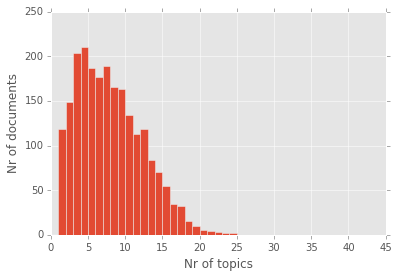

In [7]:
thetas = [model[c] for c in corpus]
plt.hist([len(t) for t in thetas], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')

In [8]:
model1 = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1.)
thetas1 = [model1[c] for c in corpus]

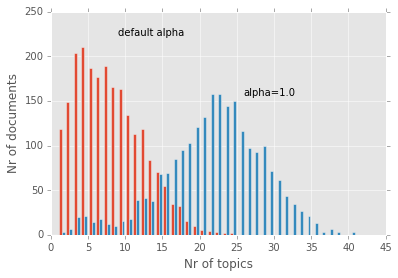

In [9]:
plt.clf()
plt.hist([[len(t) for t in thetas], [len(t) for t in thetas1]], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.text(9,223, r'default alpha')
plt.text(26,156, 'alpha=1.0')

In [ ]:
# 주제 공간에서의 유사성 비교

In [20]:
# pip install nltk -> import nltk -> nltk.download()
# pip install milk
import numpy as np
from scipy.spatial import distance
from gensim import corpora, models, similarities

In [21]:
corpus = corpora.BleiCorpus('09_data/lda/ap/ap.dat', '09_data/lda/ap/vocab.txt')

In [24]:
model = models.ldamodel.LdaModel(corpus,num_topics=100, id2word=corpus.id2word)
topics = [model[c] for c in corpus]

In [25]:
dense = np.zeros((len(topics), 100), float)

In [26]:
for ti,t in enumerate(topics):
    for tj,v in t:
        dense[ti,tj] = v

In [28]:
pairwise = distance.squareform(distance.pdist(dense))
# 한번의 호출로 sum((dense[ti] - dense[ij]**2))의 모든 값을 계산한다.

In [29]:
largest = pairwise.max()

In [30]:
for ti in range(len(topics)):
    pairwise[ti,ti] = largest + 1
# 매트릭스의 대각선 요소에 큰 값을 설정

In [33]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [36]:
closest_to(1)

835

In [ ]:
# data 출처 - http://www.cs.princeton.edu/~blei/lda-c/ap.tgz